# Import library

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Analysis

In [3]:
df = pd.read_csv("data/nyc_subway.csv")
pd.options.display.max_columns = None
df.head(5)

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,weekday,station,latitude,longitude,conds,fog,precipi,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,0,CYPRESS HILLS,40.689945,-73.872564,Clear,0,0.0,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,0,CYPRESS HILLS,40.689945,-73.872564,Partly Cloudy,0,0.0,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,0,CYPRESS HILLS,40.689945,-73.872564,Mostly Cloudy,0,0.0,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,0,CYPRESS HILLS,40.689945,-73.872564,Mostly Cloudy,0,0.0,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,0,CYPRESS HILLS,40.689945,-73.872564,Mostly Cloudy,0,0.0,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


## Distribution of ENTRIESn_hourly

In [46]:
# Filtering ENTRIESn in rain day and not rain day.
df_rain = df[['ENTRIESn_hourly']][df['rain'] == 1]
df_not_rain = df[['ENTRIESn_hourly']][df['rain'] == 0]

Text(0.5, 1.0, 'Histograms of ENTRIESn_hourly')

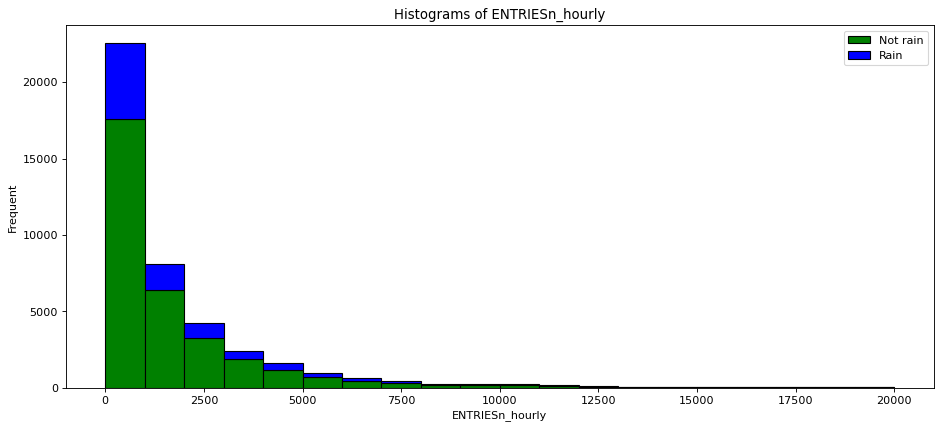

In [59]:
# Visualize by Stack Histograms
figure(figsize=(14, 6), dpi=80)
plt.hist([df_not_rain['ENTRIESn_hourly'], 
         df_rain['ENTRIESn_hourly']],
         bins=np.linspace(0, 20000, 21),
         range=np.linspace(0, 20000, 21), 
         stacked=True, 
         color = ['g','b'], 
         ec='black',
         label=['Not rain', 'Rain'])
plt.legend()
plt.xlabel('ENTRIESn_hourly')
plt.ylabel('Frequent')
plt.title('Histograms of ENTRIESn_hourly')

The distribution of `ENTRIESn_hourly` be right skewed on both rain and not rain. There are rain day fewer than not rain day

## Average number ridership in day each hour

In [91]:
# Compute avg ENTRIES in each hour.
hour_entries = df.groupby(['hour', 'ENTRIESn_hourly']).size().unstack('hour').fillna(0)
hour_entries = ((hour_entries * np.reshape(hour_entries.index, (7667, 1))).sum() / hour_entries.sum())

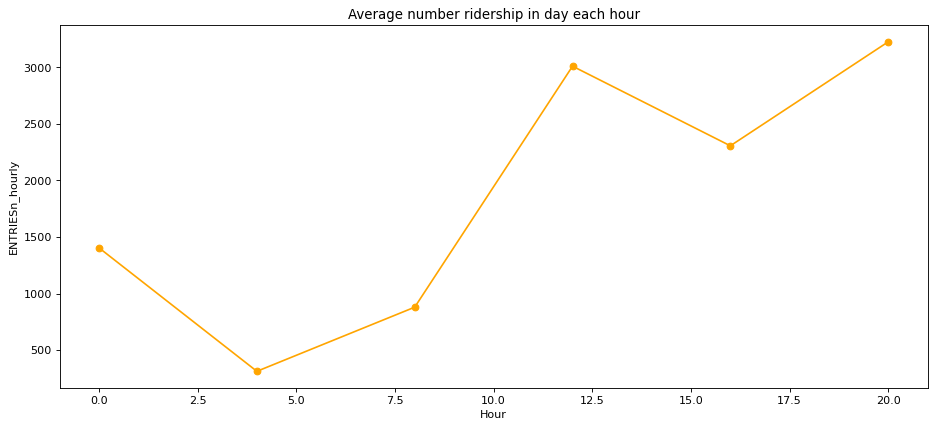

In [133]:
# Visualize by line plot.
figure(figsize=(14, 6), dpi=80)
hour_entries.plot.line(marker = 'o',color = 'orange')
plt.title("Average number ridership in day each hour")
plt.xlabel("Hour")
plt.ylabel("ENTRIESn_hourly");

- From noon, the number of ridership started to increase rapidly until the afternoon, then decreased slightly and continued to increase sharply until late at night.
- Early morning has the least amount of ridership.

## Average entries subway by day of week

In [196]:
# Compute avg ENTRIES in each day of weak. And replace day numbers by character.
day_entries = df.groupby(['day_week', 'ENTRIESn_hourly']).size().unstack('day_week').fillna(0)
day_entries = ((day_entries * np.reshape(day_entries.index, (7667, 1))).sum() / day_entries.sum())
day_entries.index = ['Sunday', 'Monday', 'Tuesday', 'Wednesday',
                                   'Thursday', 'Friday', 'Saturday']

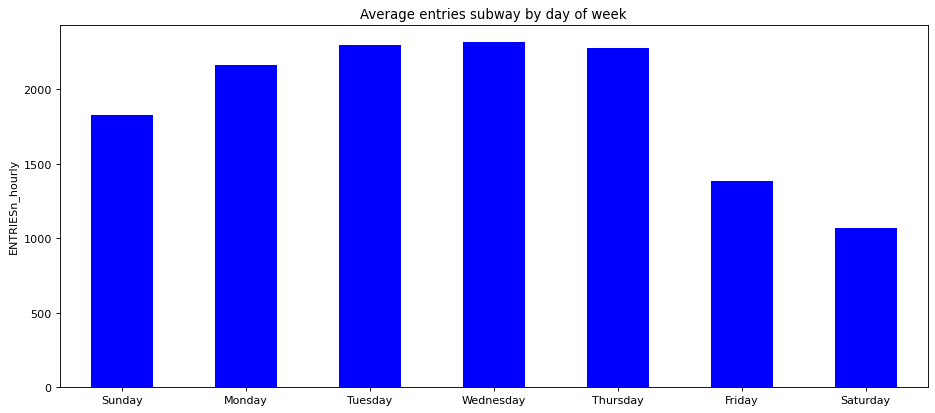

In [197]:
# Visualize by bar plot.
figure(figsize=(14, 6), dpi=80)
day_entries.plot.bar(color='b')
plt.xticks(rotation=0)
plt.ylabel('ENTRIESn_hourly')
plt.title('Average entries subway by day of week');

We can see that the number of ridership is much reduced at weekends. And peaked in the middle of the week.